## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Load Dataset

In [4]:
data_df = pd.read_csv('pima_indians_diabetes_data.csv') 

In [5]:
#displaying the head of dataset
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#shape of dataset
data_df.shape

(768, 9)

In [7]:
 #description of dataset 
data_df.describe()     

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
#dataset info
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
#dataset valuecounts
data_df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
             92       62             7              258      27.6  0.926                     44   1          1
                                                                                                            ..
0            78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
      

In [10]:
#dataset dtypes
data_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
#dataset columns
data_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Verifying Null Values

In [13]:
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
data_df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [15]:
data_df.isnull().all()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Exploratory Data Analysis (EDA)

In [16]:
data_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

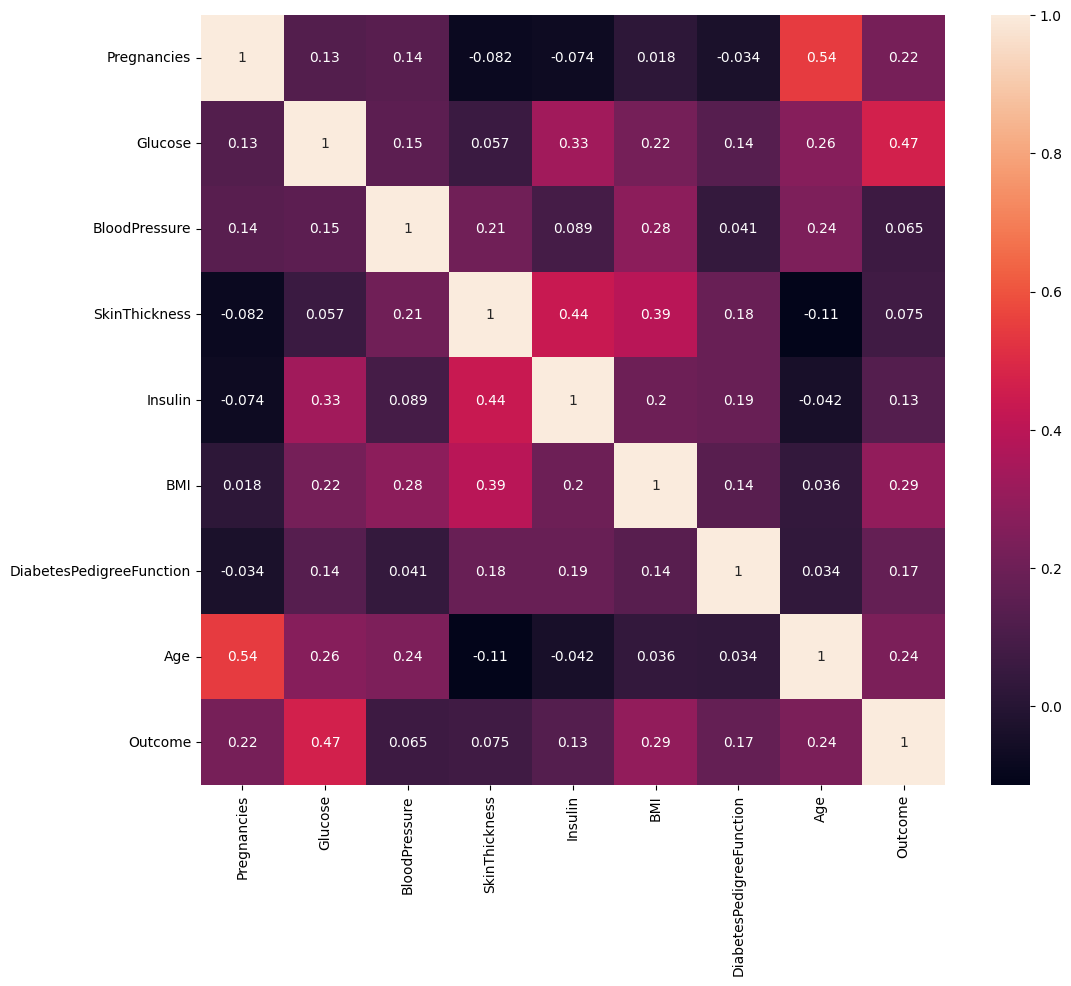

In [17]:
# Correlation
plt.figure(figsize = (12,10))

sns.heatmap(data_df.corr(), annot =True)

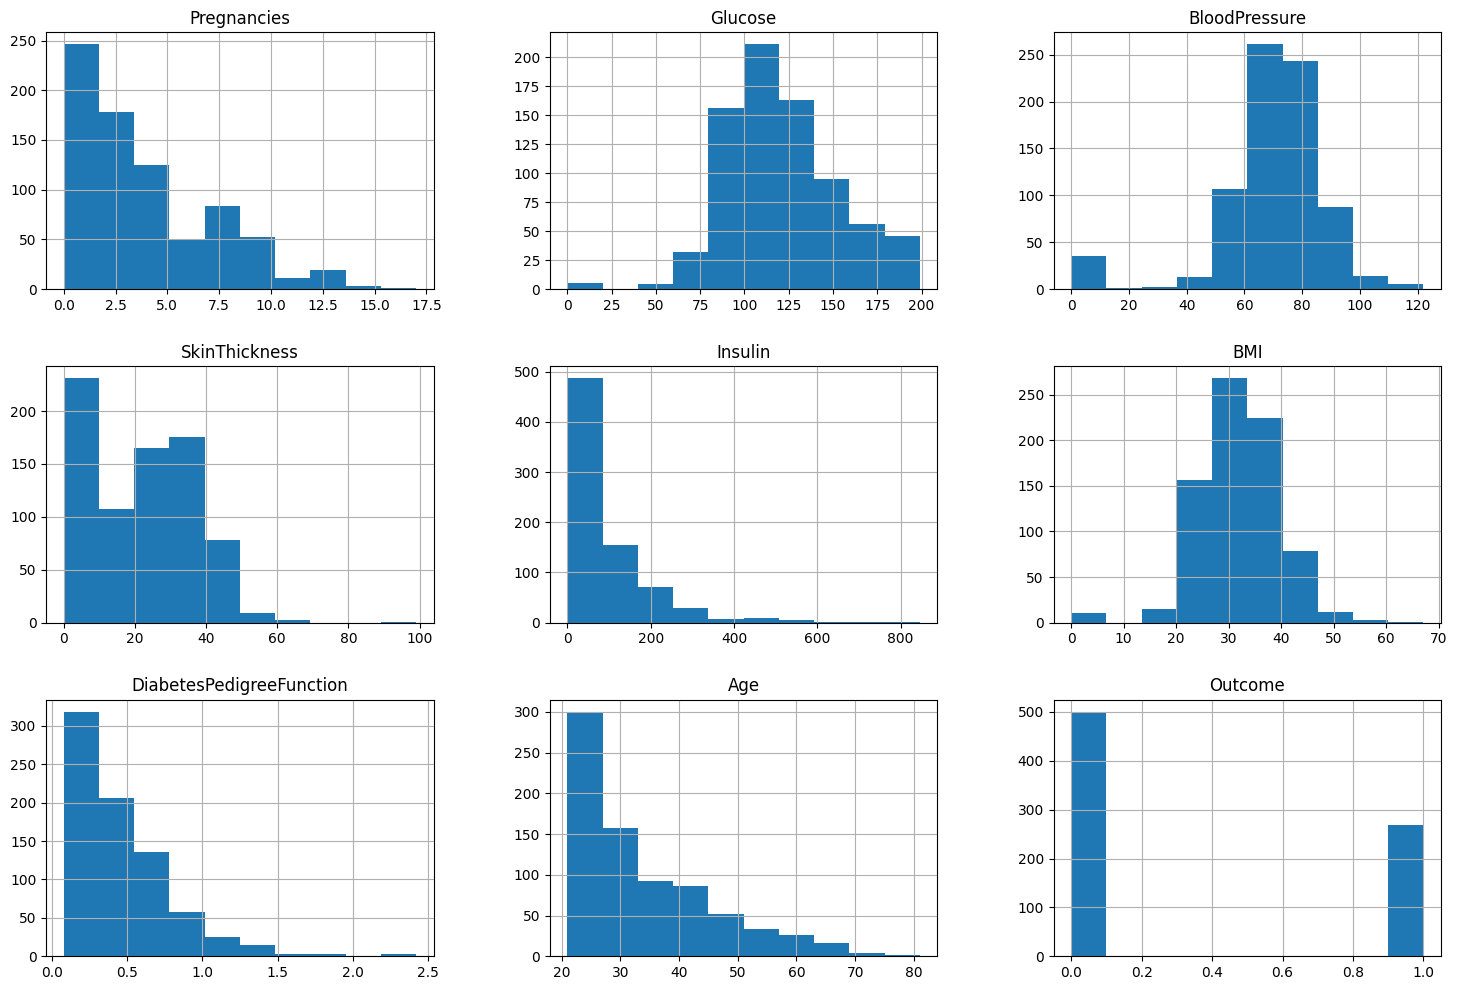

In [18]:
# Histogram
data_df.hist(figsize=(18,12))
plt.show()

<Axes: xlabel='SkinThickness'>

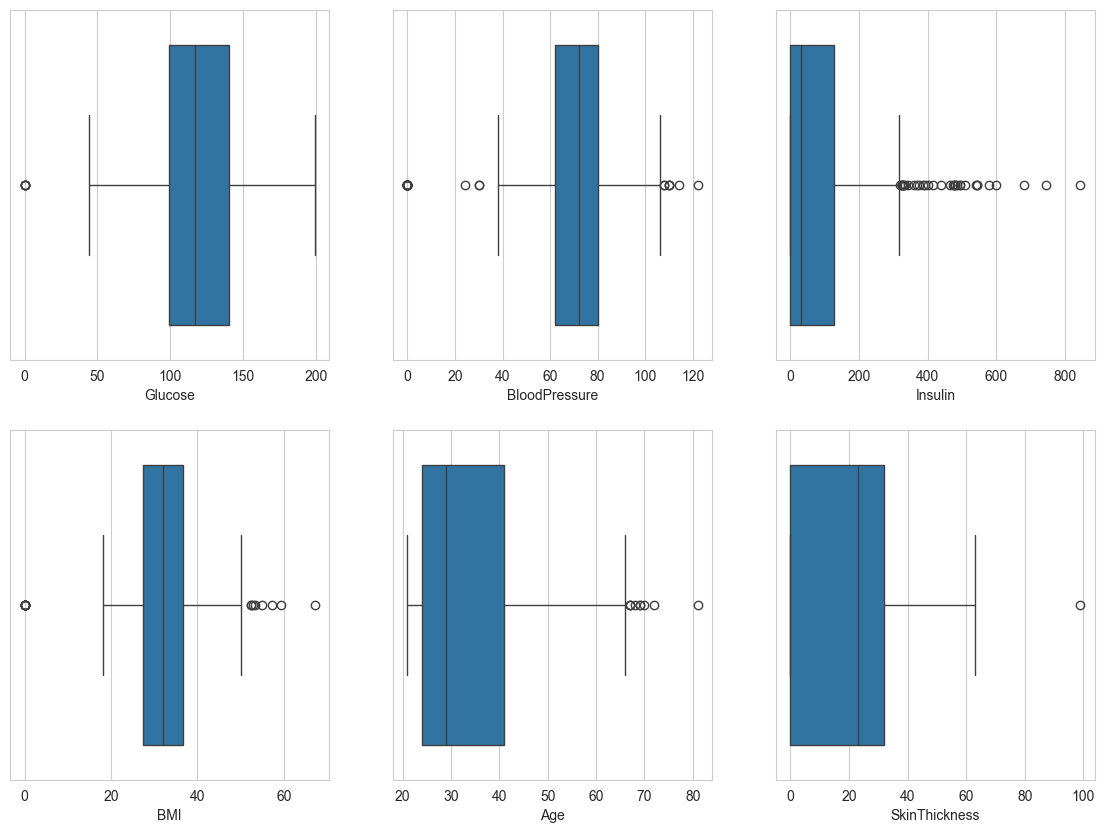

In [19]:
# Boxplot
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=data_df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=data_df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=data_df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=data_df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=data_df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=data_df)

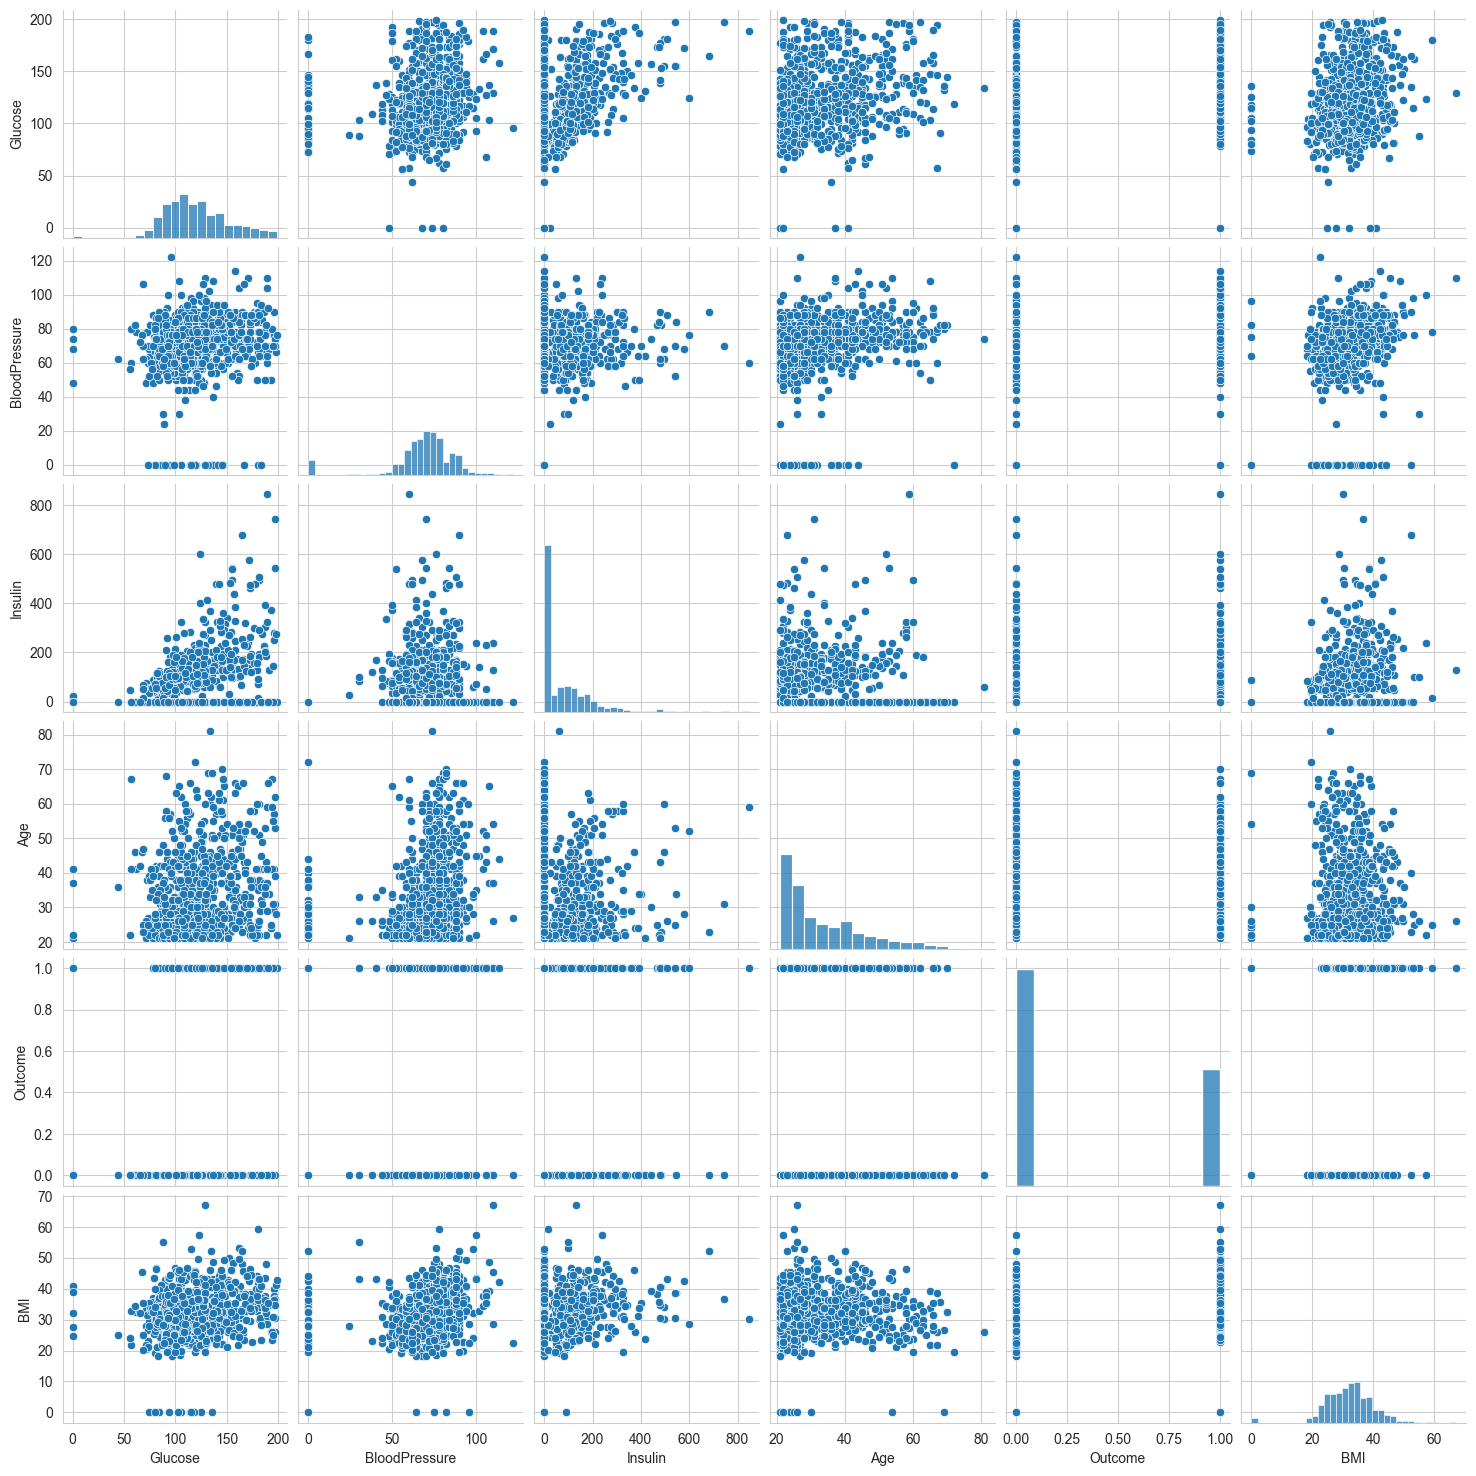

In [20]:
# pairplot 
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(data_df[mean_col],palette='Accent')

<Axes: xlabel='Outcome', ylabel='Insulin'>

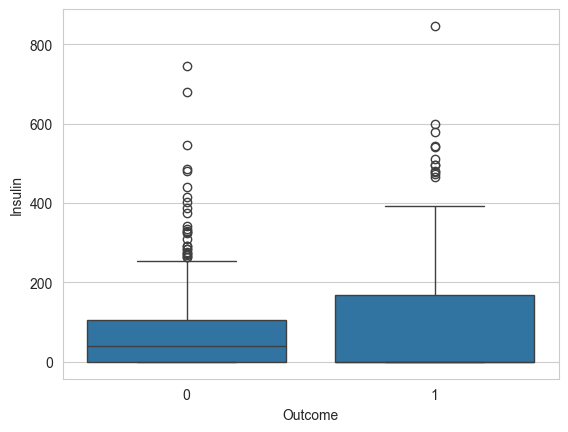

In [21]:
# Boxplot
sns.boxplot(x='Outcome',y='Insulin',data=data_df)

<Axes: xlabel='BMI', ylabel='Glucose'>

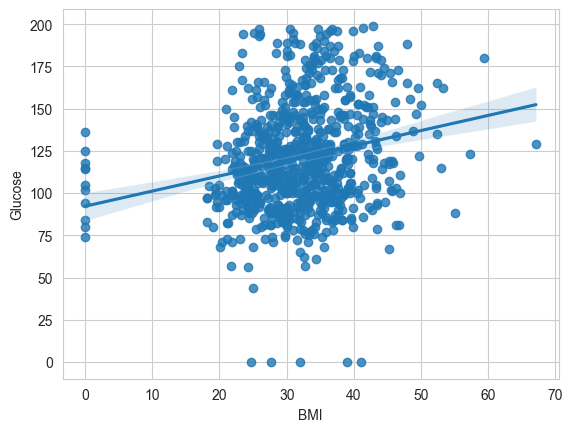

In [22]:
# Regplot
sns.regplot(x='BMI', y= 'Glucose', data=data_df)

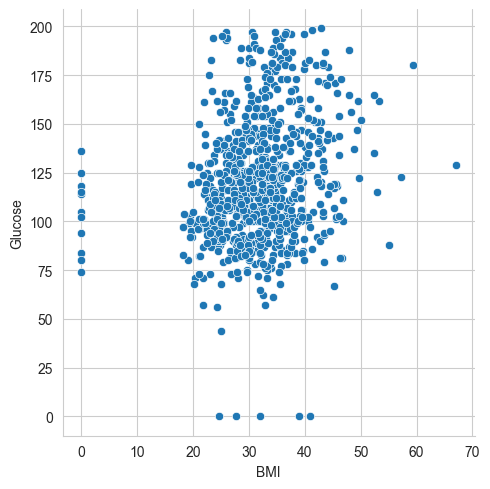

In [23]:
# Relplot
sns.relplot(x='BMI', y= 'Glucose', data=data_df)

<Axes: xlabel='Glucose', ylabel='Insulin'>

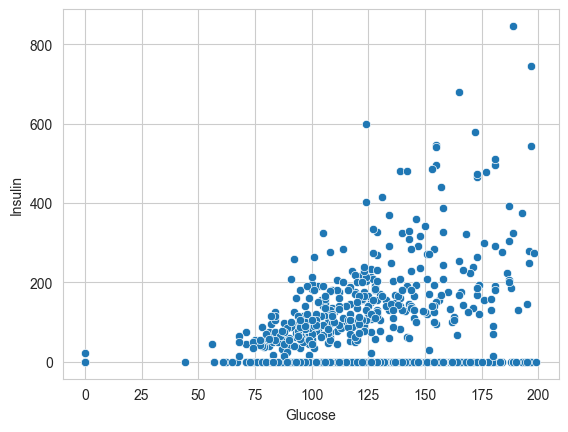

In [24]:
# Scatterplot
sns.scatterplot(x='Glucose', y= 'Insulin', data=data_df)

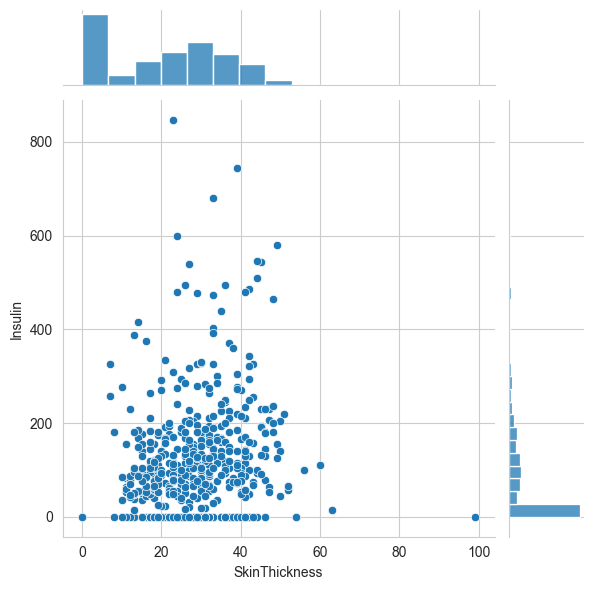

In [25]:
# Joinplot
sns.jointplot(x='SkinThickness', y= 'Insulin', data=data_df)

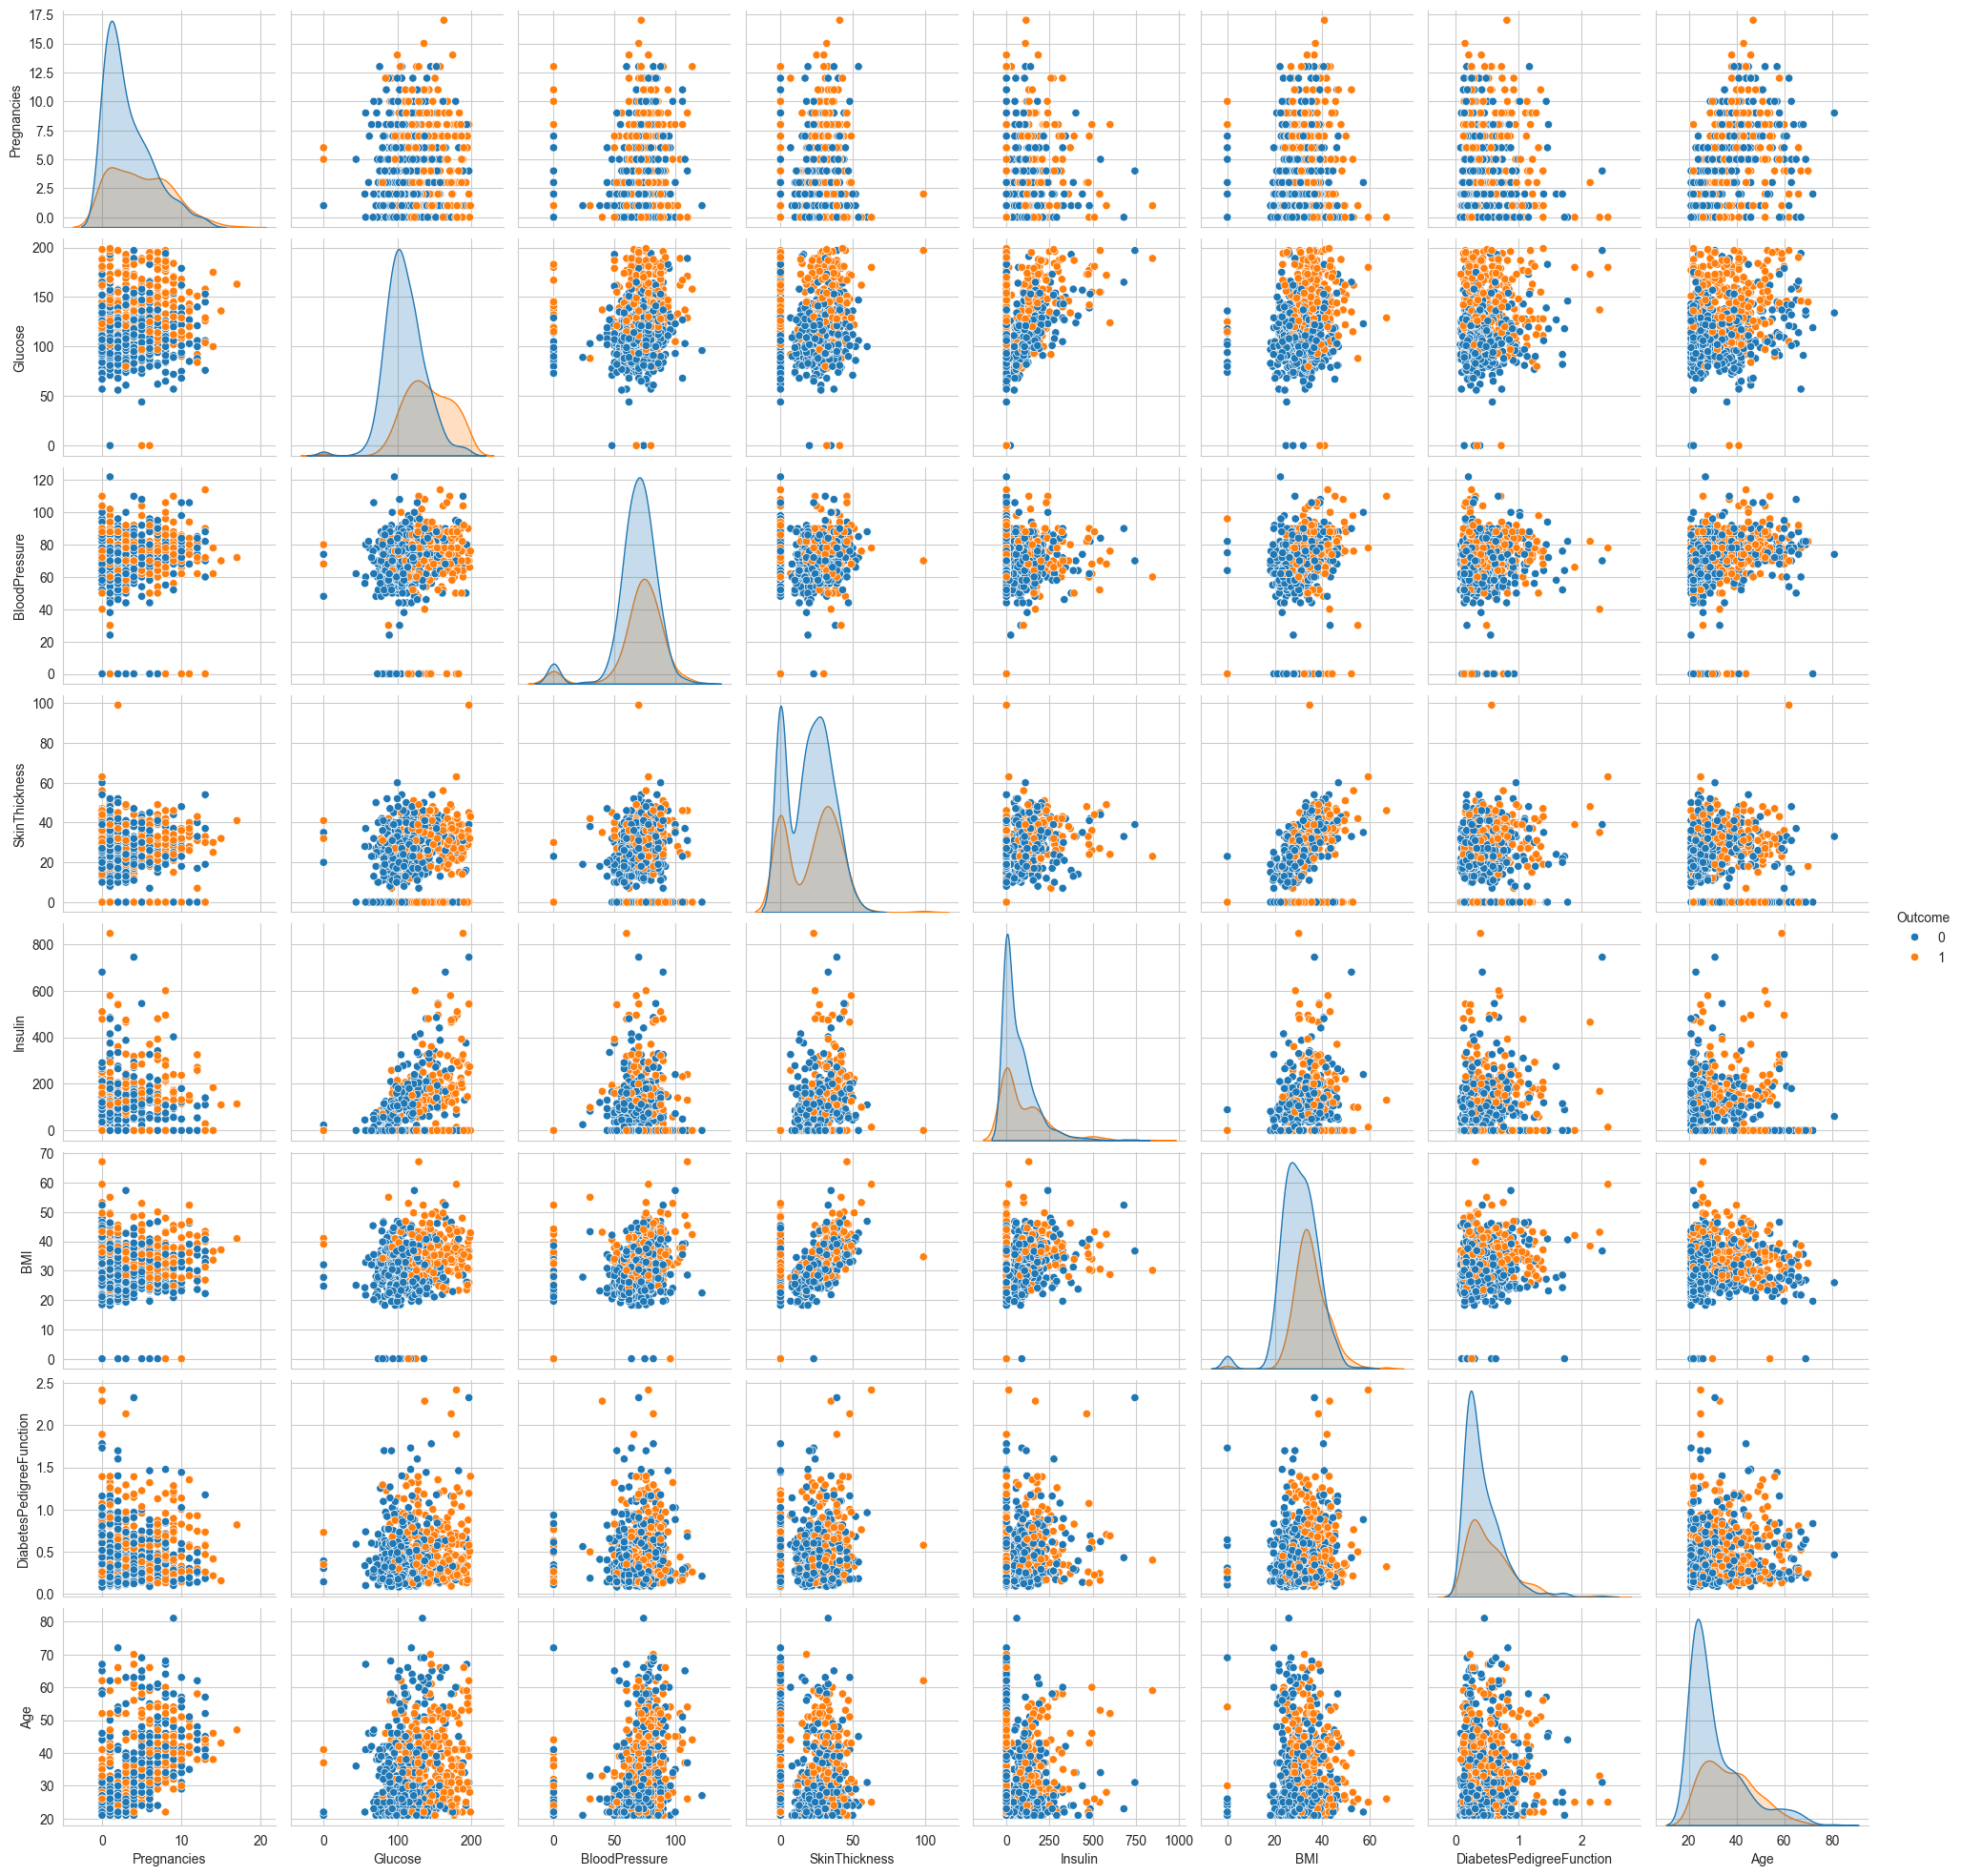

In [27]:
# Pairplot
sns.pairplot(data_df,hue='Outcome')

### Null Imputation

In [29]:
data_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']] = data_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.nan)

In [31]:
data_df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [33]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [34]:
#median
def median_target(var):   
    temp = data_df[data_df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [35]:
columns = data_df.columns
columns = columns.drop("Outcome")
for i in columns:
    median_target(i)
    data_df.loc[(data_df['Outcome'] == 0 ) & (data_df[i].isnull()), i] = median_target(i)[i][0]
    data_df.loc[(data_df['Outcome'] == 1 ) & (data_df[i].isnull()), i] = median_target(i)[i][1]

In [36]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [37]:
data_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Outlier Detection

In [38]:
# Outlier Detection
# IQR+Q1
# 50%
# 24.65->25%+50%
# 24.65->25%
for feature in data_df:
    Q1 = data_df[feature].quantile(0.25)
    Q3 = data_df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1-1.5*IQR
    upper = Q3+1.5*IQR
    if data_df[(data_df[feature]>upper)].any(axis=None):
        print(feature, "yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<Axes: xlabel='Insulin'>

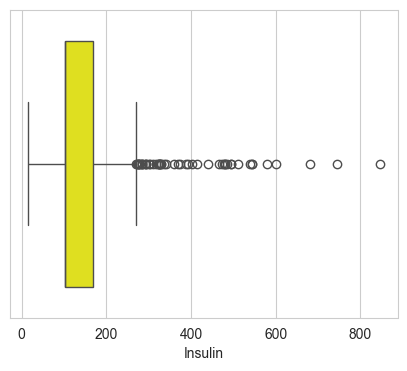

In [39]:
plt.figure(figsize=(5,4))
sns.boxplot(x= data_df["Insulin"], color="yellow")

In [40]:
Q1 = data_df.Insulin.quantile(0.25)
Q3 = data_df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1-1.5*IQR
upper = Q3+1.5*IQR
data_df.loc[data_df['Insulin']>upper, "Insulin"] = upper

<Axes: xlabel='Insulin'>

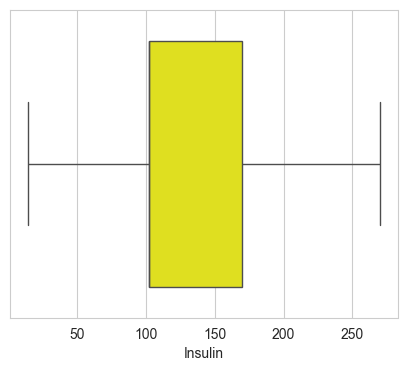

In [41]:
plt.figure(figsize=(5,4))
sns.boxplot(x= data_df["Insulin"], color="yellow")

In [42]:
# LOF
# local outlier factor
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(data_df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [43]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<Axes: xlabel='Pregnancies'>

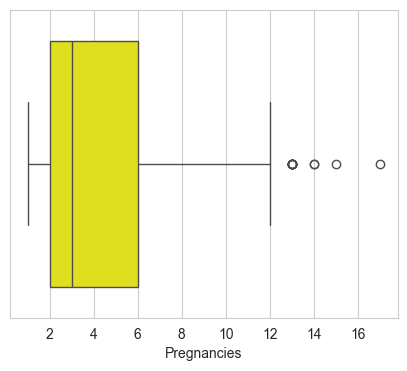

In [44]:
plt.figure(figsize=(5,4))
sns.boxplot(x= data_df["Pregnancies"], color="yellow")

In [45]:
data_df_scores = lof.negative_outlier_factor_
np.sort(data_df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [46]:
threshold = np.sort(data_df_scores)[7]

In [47]:
threshold

np.float64(-1.7497423670960557)

In [48]:
outlier = data_df_scores>threshold

In [49]:
data_df = data_df[outlier]

In [50]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [51]:
data_df.shape

(760, 9)

<Axes: xlabel='Pregnancies'>

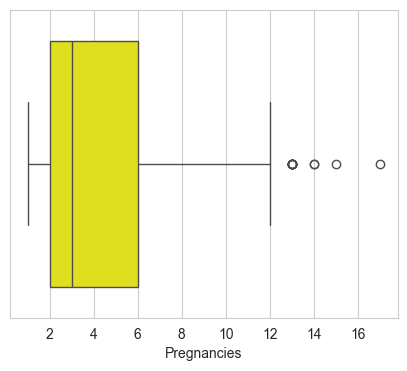

In [52]:
plt.figure(figsize=(5,4))
sns.boxplot(x= data_df["Pregnancies"], color="yellow")

### Feature Engineering

In [53]:
# Feature Enginnering
NewBMI = pd.Series(["Underweight","Normal", "Overweight","Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

In [54]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obesity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 1', 'Obesity 2', 'Obesity 3', 'Overweight', 'Underweight']

In [55]:
data_df['NewBMI'] = NewBMI
data_df.loc[data_df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
data_df.loc[(data_df["BMI"]>18.5) & data_df["BMI"]<=24.9, "NewBMI"] = NewBMI[1]
data_df.loc[(data_df["BMI"]>24.9) & data_df["BMI"]<=29.9, "NewBMI"] = NewBMI[2]
data_df.loc[(data_df["BMI"]>29.9) & data_df["BMI"]<=34.9, "NewBMI"] = NewBMI[3]
data_df.loc[(data_df["BMI"]>34.9) & data_df["BMI"]<=39.9, "NewBMI"] = NewBMI[4]
data_df.loc[data_df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [56]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [57]:
# if insulin>=16 & insuline<=166->normal
def set_insuline(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [58]:
data_df = data_df.assign(NewInsulinScore=data_df.apply(set_insuline, axis=1))

In [59]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
data_df["NewGlucose"] = NewGlucose
data_df.loc[data_df["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
data_df.loc[(data_df["Glucose"] > 70) & (data_df["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
data_df.loc[(data_df["Glucose"] > 99) & (data_df["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
data_df.loc[data_df["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [60]:
# One hot encoding
data_df = pd.get_dummies(data_df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)

In [61]:
data_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,False,True,False,False,False,False,False,False,False,True
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,False,True,False,False,False,True,False,True,False,False
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,False,True,False,False,False,False,False,False,False,True
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,False,True,False,False,False,True,False,True,False,False
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,False,False,True,False,False,False,False,False,False,True


In [62]:
data_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')

In [63]:
categorical_df = data_df[['NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

In [64]:
categorical_df.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,False,True,False,False,False,False,False,False,False,True
1,False,True,False,False,False,True,False,True,False,False
2,False,True,False,False,False,False,False,False,False,True
3,False,True,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,True


In [65]:
y=data_df['Outcome']
X=data_df.drop(['Outcome','NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis=1)

In [66]:
cols = X.columns
index = X.index

In [67]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [68]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [69]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294


In [70]:
X = pd.concat([X, categorical_df], axis=1)

In [71]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.75,0.775,0.000,1.000000,1.000000,0.177778,0.669707,1.235294,False,True,False,False,False,False,False,False,False,True
1,-0.50,-0.800,-0.375,0.142857,0.000000,-0.600000,-0.049511,0.117647,False,True,False,False,False,True,False,True,False,False
2,1.25,1.650,-0.500,0.571429,1.000000,-0.966667,0.786971,0.176471,False,True,False,False,False,False,False,False,False,True
3,-0.50,-0.700,-0.375,-0.714286,-0.126866,-0.433333,-0.528990,-0.470588,False,True,False,False,False,True,False,True,False,False
4,0.50,0.500,-2.000,1.000000,0.977612,1.233333,4.998046,0.235294,False,False,True,False,False,False,False,False,False,True


### TRAINING AND TESTING DATA

In [72]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [73]:
from sklearn.preprocessing import scale, StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Fitting

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report

In [75]:
# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred = log_reg.predict(X_test)

In [77]:
accuracy_score(y_train, log_reg.predict(X_train))

0.8470394736842105

In [78]:
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))

In [79]:
confusion_matrix(y_test, y_pred)

array([[88, 10],
       [ 6, 48]])

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.83      0.89      0.86        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152



In [81]:
# KNearestNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(accuracy_score(y_test, knn.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.881578947368421
[[88 10]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91        98
           1       0.82      0.85      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.88      0.88      0.88       152



In [82]:
# SVM
svc = SVC(probability=True)
parameter = {
    "gamma":[0.0001, 0.001, 0.01, 0.1],
    'C': [0.01, 0.05,0.5, 0.01, 1, 10, 15, 20]
}
grid_search = GridSearchCV(svc, parameter)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.01, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [83]:
# best_parameter
grid_search.best_params_

{'C': 10, 'gamma': 0.01}

In [84]:
grid_search.best_score_

np.float64(0.8618208914781196)

In [85]:
svc = SVC(C=10, gamma = 0.01, probability=True)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(accuracy_score(y_train, svc.predict(X_train)))
svc_acc = accuracy_score(y_test, svc.predict(X_test))
print(accuracy_score(y_test, svc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.875
0.9078947368421053
[[90  8]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        98
           1       0.86      0.89      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [86]:
# Decision Tree
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))

print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.8552631578947368
[[84 14]
 [ 8 46]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88        98
           1       0.77      0.85      0.81        54

    accuracy                           0.86       152
   macro avg       0.84      0.85      0.85       152
weighted avg       0.86      0.86      0.86       152



In [87]:
# hyperparameter tuning of dt
grid_param = {
    'criterion':['gini','entropy'],
    'max_depth' :  [3,5,7,10],
    'splitter' : ['best','radom'],
    'min_samples_leaf':[1,2,3,5,7], 
    'min_samples_split':[1,2,3,5,7], 
    'max_features':['auto','sqrt','log2']
}
grid_search_dt = GridSearchCV(DT, grid_param, cv=50, n_jobs=-1, verbose = 1)
grid_search_dt.fit(X_train, y_train)

Fitting 50 folds for each of 1200 candidates, totalling 60000 fits


GridSearchCV(cv=50, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'radom']},
             verbose=1)

In [88]:
grid_search_dt.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'splitter': 'best'}

In [89]:
grid_search_dt.best_score_

np.float64(0.8665384615384616)

In [90]:
DT = grid_search_dt.best_estimator_
y_pred = DT.predict(X_test)
print(accuracy_score(y_train, DT.predict(X_train)))
dt_acc = accuracy_score(y_test, DT.predict(X_test))
print(accuracy_score(y_test, DT.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9243421052631579
0.8092105263157895
[[80 18]
 [11 43]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        98
           1       0.70      0.80      0.75        54

    accuracy                           0.81       152
   macro avg       0.79      0.81      0.80       152
weighted avg       0.82      0.81      0.81       152



In [91]:
# Random Forest
rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 0.75, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [92]:
y_pred = rand_clf.predict(X_test)

In [93]:
y_pred = rand_clf.predict(X_test)
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(accuracy_score(y_test, rand_clf.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9901315789473685
0.8947368421052632
[[88 10]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        98
           1       0.83      0.89      0.86        54

    accuracy                           0.89       152
   macro avg       0.88      0.89      0.89       152
weighted avg       0.90      0.89      0.90       152



In [94]:
# GradientBoost Classifier
gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 10, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [95]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [96]:
grid_search_gbc.best_score_

np.float64(0.8896721311475411)

In [97]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 150)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=150)

In [98]:
gbc = grid_search_gbc.best_estimator_
y_pred = gbc.predict(X_test)
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(accuracy_score(y_test, gbc.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9983552631578947
0.9144736842105263
[[91  7]
 [ 6 48]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        98
           1       0.87      0.89      0.88        54

    accuracy                           0.91       152
   macro avg       0.91      0.91      0.91       152
weighted avg       0.91      0.91      0.91       152



In [99]:
from xgboost import XGBClassifier 
xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 10, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=180,
              n_jobs=None, num_parallel_tree=None, ...)

In [100]:
y_pred = xgb.predict(X_test)
print(accuracy_score(y_train, xgb.predict(X_train)))
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))
print(accuracy_score(y_test, xgb.predict(X_test)))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9736842105263158
0.875
[[88 10]
 [ 9 45]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90        98
           1       0.82      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.88      0.88      0.88       152



In [105]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define ANN model
ann = Sequential()
ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(64, activation='relu'))
ann.add(Dense(1, activation='sigmoid'))  # for binary classification

# Compile model
ann.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train model
ann.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# Predict
y_pred_probs = ann.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).reshape(-1)

# Evaluation
print(accuracy_score(y_train, (ann.predict(X_train) > 0.5).astype(int).reshape(-1)))
ann_acc = accuracy_score(y_test, y_pred)
print(ann_acc)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1.0
0.881578947368421
[[87 11]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        98
           1       0.81      0.87      0.84        54

    accuracy                           0.88       152
   macro avg       0.87      0.88      0.87       152
weighted avg       0.88      0.88      0.88       152



In [111]:
from sklearn.ensemble import VotingClassifier


# Create ensemble (soft voting uses predict_proba)
ensemble = VotingClassifier(
    estimators=[('log_reg', log_reg), ('knn', knn), ('svc', svc), ('DT', DT), ('rand_clf', rand_clf), ('gbc', gbc), ('xgb', xgb)],
    voting='soft'  # use 'hard' if predict_proba not supported
)

ensemble.fit(X_train, y_train)

# Evaluate ensemble
y_pred = ensemble.predict(X_test)
ensemble_acc = accuracy_score(y_test, y_pred)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Ensemble Accuracy: 0.9078947368421053
[[91  7]
 [ 7 47]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        98
           1       0.87      0.87      0.87        54

    accuracy                           0.91       152
   macro avg       0.90      0.90      0.90       152
weighted avg       0.91      0.91      0.91       152



In [120]:
# Model Comparison
model_score = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Decision Tree Classifier', 'Random Forest Classifier','XgBoost', 'ANN','Ensemble_model'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(svc_acc,4)-1, 100*round(dt_acc,4), 100*round(rand_acc,4), 
               100*round(xgb_acc,4), 100*round(ann_acc,4) , 100*round(ensemble_acc,4)]
})
model_score.sort_values(by = 'Score', ascending = False).reset_index(drop=True)

,Model,Score
0,Ensemble_model,90.79
1,SVM,89.79
2,Random Forest Classifier,89.47
3,Logistic Regression,89.47
4,ANN,88.16
5,KNN,88.16
6,XgBoost,87.50
7,Decision Tree Classifier,80.92


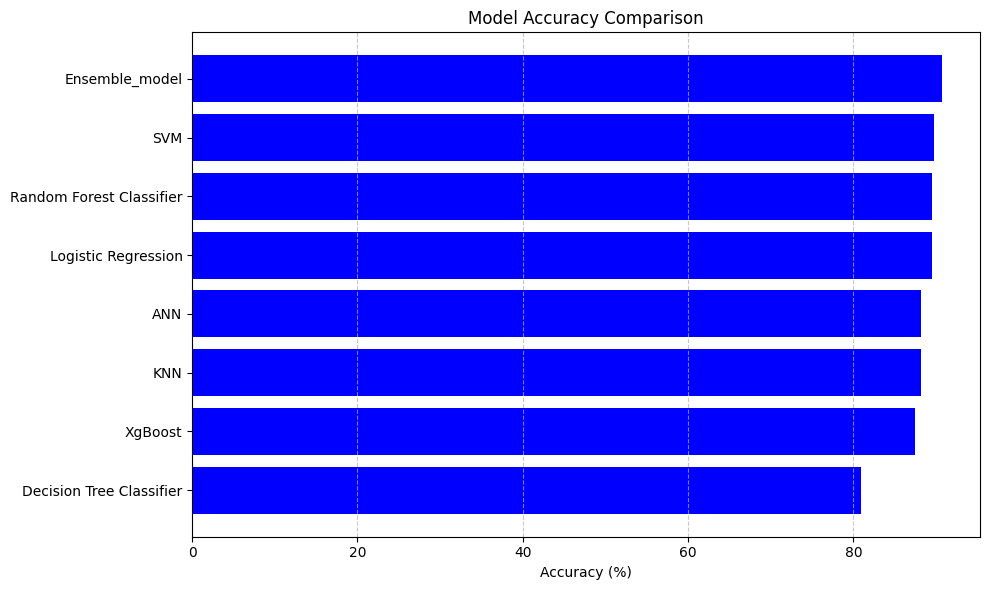

In [6]:
# Plotting
plt.figure(figsize=(10, 6))
plt.barh(model_scores['Model'], model_scores['Score'], color='blue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

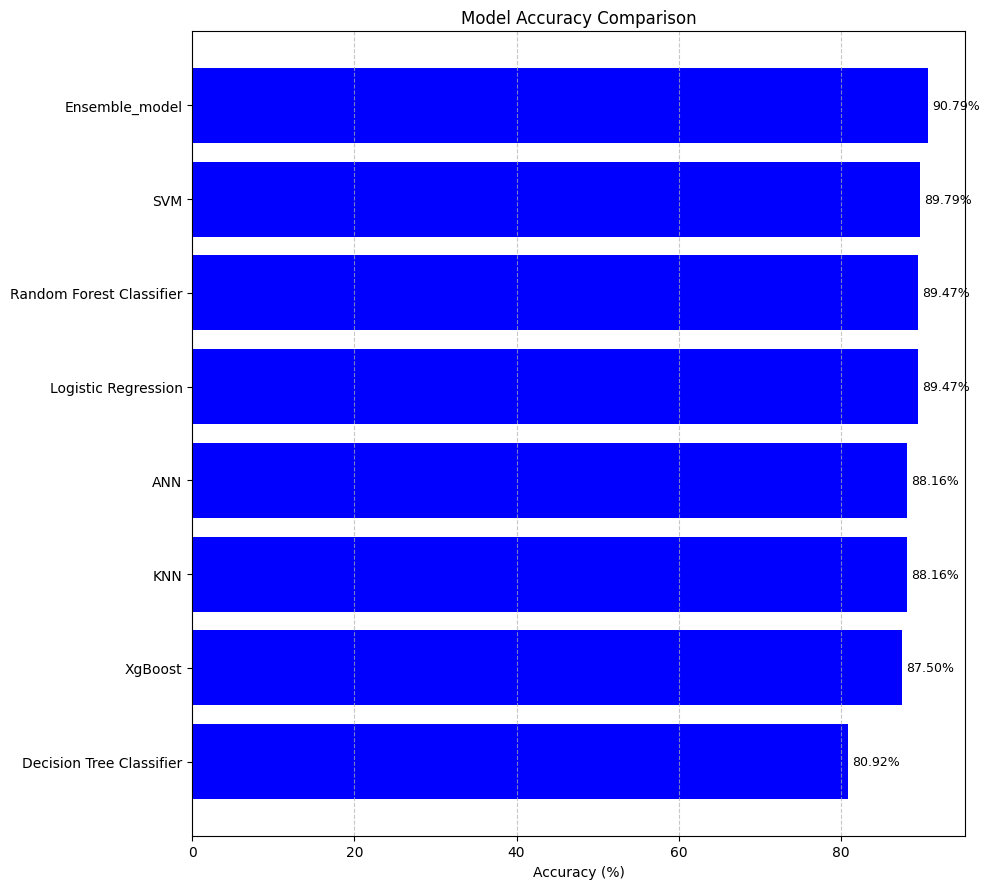

In [10]:
# Plotting
plt.figure(figsize=(10, 9))
bars = plt.barh(model_scores['Model'], model_scores['Score'], color='blue')
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Highest score on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Add numbers at the end of bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

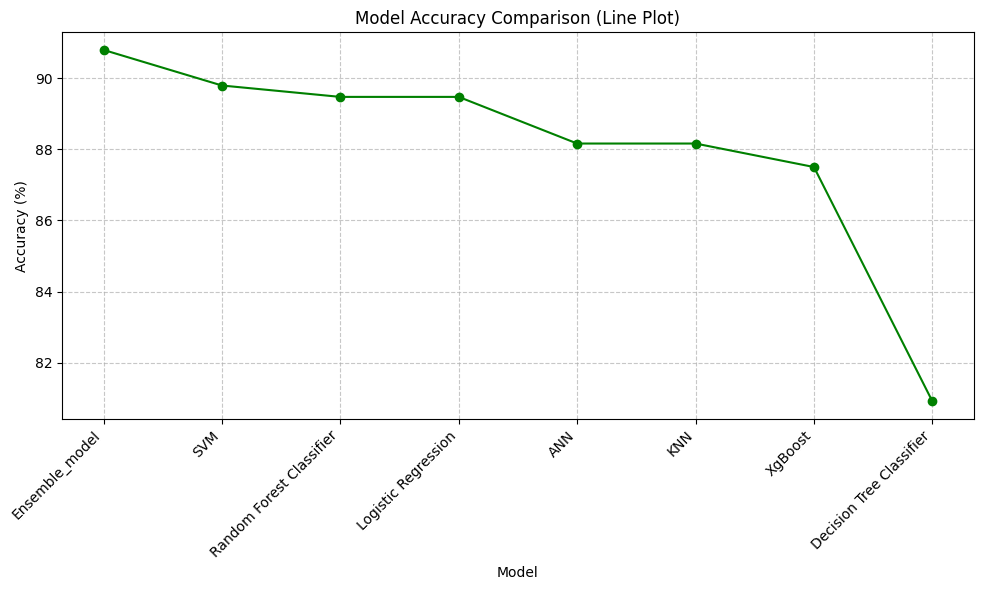

In [3]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(model_scores['Model'], model_scores['Score'], marker='o', linestyle='-', color='green')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison (Line Plot)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### The ensemble model achieved the highest accuracy at 90.79%, outperforming all individual models. SVM, Random Forest, and Logistic Regression were the top-performing standalone models, while the Decision Tree had the lowest score. This confirms the advantage of combining models for better accuracy.